# Î®∏Ïã†Îü¨Îãù ÏûÖÎ¨∏ Í≥ºÏ†ú 
## ÏÜåÌîÑÌä∏Ïõ®Ïñ¥Í≥µÌïôÍ≥º 2022101„ÖÅ„ÖÅ„ÖÅ Í∂åÏàòÌòÑ
## Ïä§ÎßàÌä∏ÎìúÎ°†Í≥µÌïôÍ≥º 2021129053 Ïù¥ÏõêÌëú

### male_weightsÏôÄ female_weightsÎ•º ÏÉùÏÑ±ÌïòÏó¨ Ï≤¥Ï§ëÎç∞Ïù¥ÌÑ∞Î•º ÎßåÎì§Í≥†
### ÏÑ±Î≥ÑÏùÑ Î™©Ìëú Î≥ÄÏàò, Ï≤¥Ï§ëÏùÑ ÏòàÏ∏°Î≥ÄÏàòÎ°ú ÏÇ¨Ïö©ÌïòÏó¨
### MLE, MAP, LDA Î™®Îç∏ÏùÑ ÏÉùÏÑ±ÌïòÍ≥† ÏãúÌóòÌïúÎã§

In [3]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
from sklearn.metrics import accuracy_score

# 1Ô∏è‚É£ Îç∞Ïù¥ÌÑ∞ ÏÉùÏÑ± 
np.random.seed(42)
male_weights = np.random.normal(loc=75, scale=10, size=100) + np.random.normal(0, 2, 100) 
female_weights = np.random.normal(loc=60, scale=8, size=100) + np.random.normal(0, 2, 100) 


In [4]:
# 2Ô∏è‚É£ Ìé∏Ï§ëÎêú Í≤ΩÌñ• ÏÑ†Ìò∏ ÏÉâÏÉÅ Ï∂îÍ∞Ä
male_colors = np.random.choice([1, 0], size=100, p=[0.3, 0.7])  
female_colors = np.random.choice([1, 0], size=100, p=[0.7, 0.3]) 

In [5]:
# 3Ô∏è‚É£ ÎèÖÎ¶ΩÎ≥ÄÏàòÏù∏ ÌÇ§ Îç∞Ïù¥ÌÑ∞ Ï∂îÍ∞Ä 
male_heights = np.random.normal(loc=175, scale=6, size=100)
female_heights = np.random.normal(loc=162, scale=5, size=100)


## (Îç∞Ïù¥ÌÑ∞ÏÖã ÏÑ§Ï†ï)

#### ÎÇ®ÎÖÄ Ï≤¥Ï§ëÏùÑ Í∞ÅÍ∞Å 100Í∞úÏî© ÏÉùÏÑ±

#### np.random.normalÏùÑ ÏÇ¨Ïö©ÌïòÏó¨ Ï†ïÍ∑úÎ∂ÑÌè¨Î•º ÏÑ§Ï†ï

#### np.random.normal(0, 2, 100)ÏùÑ ÏÇ¨Ïö©ÌïòÏó¨ Ïû°ÏùåÏùÑ Ï∂îÍ∞Ä

#### ÏÑ†Ìò∏ ÏÉâÏÉÅÏùÑ Ï∂îÍ∞ÄÌïòÎêò, Ìé∏Ï§ëÎêú Í≤ΩÌñ• 30% 70%Î°ú ÏÑ§Ï†ï

#### ÏïÑÎûòÏùò Íµ¨ÌòÑÌï† ÌÇ§ÏôÄ Ï≤¥Ï§ëÏùÑ ÎπÑÍµêÌïòÎäî Î™®Îç∏ÏùÑ ÏÉùÏÑ±ÌïòÍ∏∞ ÏúÑÌïú ÎèÖÎ¶ΩÎ≥ÄÏàòÏù∏ ÌÇ§ Îç∞Ïù¥ÌÑ∞ Ï∂îÍ∞Ä

In [7]:
# 4Ô∏è‚É£ Îç∞Ïù¥ÌÑ∞ÌîÑÎ†àÏûÑ ÏÉùÏÑ±
df = pd.DataFrame({
    "Weight": np.concatenate([male_weights, female_weights]),
    "Color": np.concatenate([male_colors, female_colors]),  
    "Height": np.concatenate([male_heights, female_heights]),  
    "Gender": ["Male"] * 100 + ["Female"] * 100
})


In [8]:
# Îç∞Ïù¥ÌÑ∞ÌîÑÎ†àÏûÑÏùò head 10Ìñâ Ï∂úÎ†•
print(" Îç∞Ïù¥ÌÑ∞ÌîÑÎ†àÏûÑÏùò head 10Ìñâ:")
print(df.head(10))

# Îç∞Ïù¥ÌÑ∞ÌîÑÎ†àÏûÑÏùò tail 10Ìñâ Ï∂úÎ†•
print("\n Îç∞Ïù¥ÌÑ∞ÌîÑÎ†àÏûÑÏùò tail 10Ìñâ:")
print(df.tail(10))

 Îç∞Ïù¥ÌÑ∞ÌîÑÎ†àÏûÑÏùò head 10Ìñâ:
      Weight  Color      Height Gender
0  77.136400      0  177.025616   Male
1  72.776066      1  172.528738   Male
2  80.791456      1  172.074363   Male
3  88.625744      0  172.404651   Male
4  72.335895      0  177.366713   Male
5  73.466732      0  172.474093   Male
6  94.564500      0  176.738649   Male
7  83.023503      0  187.452405   Male
8  70.820357      0  180.226748   Male
9  80.276709      0  173.043859   Male

 Îç∞Ïù¥ÌÑ∞ÌîÑÎ†àÏûÑÏùò tail 10Ìñâ:
        Weight  Color      Height  Gender
190  56.538193      0  164.588295  Female
191  57.039831      0  158.371281  Female
192  52.644616      1  162.933834  Female
193  70.459734      0  158.223085  Female
194  65.215004      0  158.942411  Female
195  53.518372      1  154.966695  Female
196  63.770530      1  157.383834  Female
197  65.166141      0  155.241577  Female
198  66.273817      1  157.120634  Female
199  67.512663      0  167.268209  Female


#### Îç∞Ïù¥ÌÑ∞ ÌîÑÎ†àÏûÑÏùò ÏÉùÏÑ±

#### Color Í∞í 0 == Blue ÏÑ†Ìò∏, Color Í∞í 1 == Red ÏÑ†Ìò∏

#### ÏÑ†Ìò∏ÏÉâÏÉÅ Î∞è ÌÇ§ÏôÄ Î™∏Î¨¥Í≤å ÏÑ±Î≥ÑÏùÑ ÌÜµÌïú Îç∞Ïù¥ÌÑ∞ÌîÑÎ†àÏûÑ

In [10]:
# 5Ô∏è‚É£ MLE Î∞è MAP Í¥ÄÎ†® ÌÜµÍ≥Ñ
mle_male_mean = np.mean(male_weights)
mle_male_std = np.std(male_weights)
mle_female_mean = np.mean(female_weights)
mle_female_std = np.std(female_weights)

#### ÎÇ®ÎÖÄ Ï≤¥Ï§ë Î∂ÑÌè¨Î•º ÌôúÏö©ÌïòÏó¨ Ï†ïÍ∑úÎ∂ÑÌè¨Î•º Î™®Îç∏ÎßÅ

In [12]:
# ÏÇ¨Ï†Ñ ÌôïÎ•† ÏÑ§Ï†ï
prior_male = 0.7
prior_female = 0.3

### Îç∞Ïù¥ÌÑ∞Ïùò Ïã§Ï†ú Î∂ÑÌè¨Î•º Î∞òÏòÅÌïú ÏÇ¨Ï†ÑÌôïÎ•† Í≥ÑÏÇ∞

In [14]:
# MLE ÏòàÏ∏° Ìï®Ïàò
def mle_estimate(weight):
    return "Male" if abs(weight - mle_male_mean) < abs(weight - mle_female_mean) else "Female"

# MAP ÏòàÏ∏° Ìï®Ïàò
def map_estimate(weight):
    male_likelihood = (1 / (mle_male_std * np.sqrt(2 * np.pi))) * np.exp(-0.5 * ((weight - mle_male_mean) / mle_male_std) ** 2)
    female_likelihood = (1 / (mle_female_std * np.sqrt(2 * np.pi))) * np.exp(-0.5 * ((weight - mle_female_mean) / mle_female_std) ** 2)
    male_posterior = male_likelihood * prior_male
    female_posterior = female_likelihood * prior_female
    return "Male" if male_posterior > female_posterior else "Female"

In [15]:
# 6Ô∏è‚É£ Í≤∞Ï†ï Í≤ΩÍ≥Ñ Ï∞æÍ∏∞ (MLE & MAP)
decision_boundary = (mle_male_mean + mle_female_mean) / 2

#### MLEÏùò Í≤∞Ï†ïÍ≤ΩÍ≥ÑÎäî ÏúÑÏôÄ Í∞ôÏù¥, MAPÏùò Í≤∞Ï†ïÍ≤ΩÍ≥ÑÎäî ÏÇ¨Ï†ÑÌôïÎ•†ÏùÑ Í≥†Î†§ÌïòÏó¨ MAP ÏòàÏ∏° Ìï®ÏàòÏóê Íµ¨ÌòÑ

In [17]:
# 7Ô∏è‚É£ ÌïôÏäµ Î∞è ÏãúÌóò Îç∞Ïù¥ÌÑ∞ÏÖã Íµ¨Î∂Ñ
train_data, test_data = train_test_split(df, test_size=0.25, random_state=42)

In [18]:
# MLE ÏòàÏ∏° Ï†ÅÏö©
train_predictions_mle = train_data["Weight"].apply(mle_estimate)
train_accuracy_mle = accuracy_score(train_data["Gender"], train_predictions_mle)

test_predictions_mle = test_data["Weight"].apply(mle_estimate)
test_accuracy_mle = accuracy_score(test_data["Gender"], test_predictions_mle)

#### Îã®ÏàúÌûà Ï≤¥Ï§ëÏù¥ ÎÇ®ÏÑ± ÌèâÍ∑†Ïóê Í∞ÄÍπåÏö∞Î©¥ ‚ÄúMale‚Äù, Ïó¨ÏÑ± ÌèâÍ∑†Ïóê Í∞ÄÍπåÏö∞Î©¥ ‚ÄúFemale‚Äù ÏúºÎ°ú ÌåêÎã®.

#### ÏµúÎåÄÏö∞ÎèÑ(ML, Maximum Likelihood)Ïóê Í∏∞Î∞òÌïú Í≤∞Ï†ï Í≤ΩÍ≥Ñ Ï†ÅÏö©.

In [20]:
# MAP ÏòàÏ∏° Ï†ÅÏö©
train_predictions_map = train_data["Weight"].apply(map_estimate)
train_accuracy_map = accuracy_score(train_data["Gender"], train_predictions_map)

test_predictions_map = test_data["Weight"].apply(map_estimate)
test_accuracy_map = accuracy_score(test_data["Gender"], test_predictions_map)

#### MLEÎ≥¥Îã§ Ìïú Îã®Í≥Ñ Î∞úÏ†ÑÎêú Î∞©ÏãùÏúºÎ°ú, ÏÇ¨Ï†Ñ ÌôïÎ•†(Prior)Í≥º Ïö∞ÎèÑ(Likelihood)Î•º Í≥†Î†§ÌïòÏó¨ ÏòàÏ∏°.

#### Í∞Å ÌÅ¥ÎûòÏä§(ÎÇ®ÏÑ±/Ïó¨ÏÑ±)Ïùò Î∂ÑÌè¨Î•º Í≥†Î†§Ìïú ÏµúÏ†ÅÏùò Í≤ΩÍ≥ÑÎ•º ÏÇ¨Ïö©.

In [22]:
# Ï†ïÌôïÎèÑ Ï∂úÎ†•
print(f" MLE Î™®Îç∏ ÌïôÏäµ Îç∞Ïù¥ÌÑ∞ Ï†ïÌôïÎèÑ: {train_accuracy_mle * 100:.2f}%")
print(f" MLE Î™®Îç∏ ÏãúÌóò Îç∞Ïù¥ÌÑ∞ Ï†ïÌôïÎèÑ: {test_accuracy_mle * 100:.2f}%")
print(f" MAP Î™®Îç∏ ÌïôÏäµ Îç∞Ïù¥ÌÑ∞ Ï†ïÌôïÎèÑ: {train_accuracy_map * 100:.2f}%")
print(f" MAP Î™®Îç∏ ÏãúÌóò Îç∞Ïù¥ÌÑ∞ Ï†ïÌôïÎèÑ: {test_accuracy_map * 100:.2f}%")

 MLE Î™®Îç∏ ÌïôÏäµ Îç∞Ïù¥ÌÑ∞ Ï†ïÌôïÎèÑ: 80.00%
 MLE Î™®Îç∏ ÏãúÌóò Îç∞Ïù¥ÌÑ∞ Ï†ïÌôïÎèÑ: 76.00%
 MAP Î™®Îç∏ ÌïôÏäµ Îç∞Ïù¥ÌÑ∞ Ï†ïÌôïÎèÑ: 70.00%
 MAP Î™®Îç∏ ÏãúÌóò Îç∞Ïù¥ÌÑ∞ Ï†ïÌôïÎèÑ: 74.00%


In [23]:
# 8Ô∏è‚É£ ÏãúÍ∞ÅÌôî - MLEÏôÄ MAPÏùò Î∂ÑÌè¨ ÎπÑÍµê
plt.figure(figsize=(12, 6))

<Figure size 1200x600 with 0 Axes>

<Figure size 1200x600 with 0 Axes>

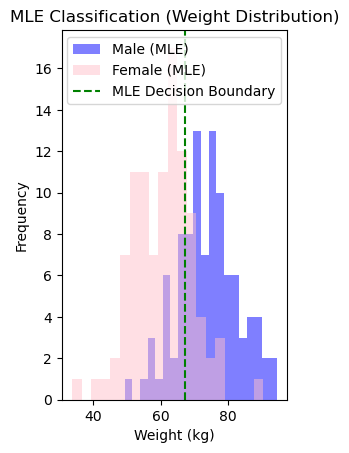

In [24]:
# MLE Î∂ÑÌè¨
plt.subplot(1, 2, 1)
plt.hist(male_weights, bins=20, alpha=0.5, label='Male (MLE)', color='blue')
plt.hist(female_weights, bins=20, alpha=0.5, label='Female (MLE)', color='pink')
plt.axvline(x=decision_boundary, color='green', linestyle='--', label='MLE Decision Boundary')
plt.title('MLE Classification (Weight Distribution)')
plt.xlabel('Weight (kg)')
plt.ylabel('Frequency')
plt.legend()

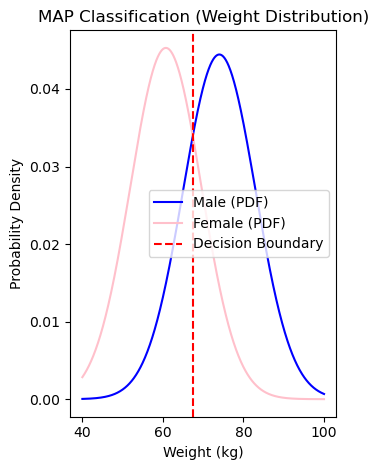

In [25]:
# MAP Î∂ÑÌè¨
plt.subplot(1, 2, 2)
weights = np.linspace(40, 100, 1000)
male_pdf = (1 / (mle_male_std * np.sqrt(2 * np.pi))) * np.exp(-0.5 * ((weights - mle_male_mean) / mle_male_std) ** 2)
female_pdf = (1 / (mle_female_std * np.sqrt(2 * np.pi))) * np.exp(-0.5 * ((weights - mle_female_mean) / mle_female_std) ** 2)

plt.plot(weights, male_pdf, label='Male (PDF)', color='blue')
plt.plot(weights, female_pdf, label='Female (PDF)', color='pink')
plt.axvline(x=decision_boundary, color='red', linestyle='--', label='Decision Boundary')
plt.title('MAP Classification (Weight Distribution)')
plt.xlabel('Weight (kg)')
plt.ylabel('Probability Density')
plt.legend()

plt.tight_layout()
plt.show()

In [26]:
# Linear Discriminant Analysis (LDA)
features = df[['Weight', 'Height']].values
labels = df['Gender'].values

# ÌïôÏäµ Î∞è ÏãúÌóò Îç∞Ïù¥ÌÑ∞ÏÖã Íµ¨Î∂Ñ
train_data, test_data, train_labels, test_labels = train_test_split(features, labels, test_size=0.25, random_state=42)

# LDA Î™®Îç∏ ÌïôÏäµ
lda = LinearDiscriminantAnalysis()
lda.fit(train_data, train_labels)

# ÏòàÏ∏° Î∞è Ï†ïÌôïÎèÑ Í≥ÑÏÇ∞
y_pred = lda.predict(test_data)
test_accuracy_lda = accuracy_score(test_labels, y_pred)
print(f' LDA Î™®Îç∏ Ï†ïÌôïÎèÑ: {test_accuracy_lda * 100:.2f}%')


 LDA Î™®Îç∏ Ï†ïÌôïÎèÑ: 94.00%


#### Îëê Î≥ÄÏàò, (ÏÑ†Ìò∏ ÏÉâÏÉÅÎåÄÏã†) ÎèÖÎ¶ΩÏù∏ ÎëêÎ≥ÄÏàò ÌÇ§ÏôÄ Ï≤¥Ï§ëÏù¥ Ìè¨Ìï®Îêú Îç∞Ïù¥ÌÑ∞Ïóê ÎåÄÌïòÏó¨ LDA Ïã§Ìñâ

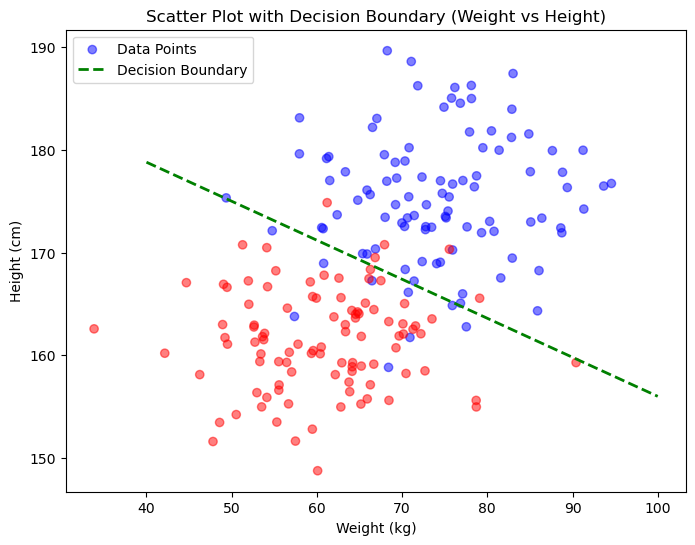

In [28]:
# üîü ÏãúÍ∞ÅÌôî - Scatter plotÍ≥º Í≤∞Ï†ïÍ≤ΩÍ≥Ñ
plt.figure(figsize=(8, 6))
colors = ['blue' if g == 'Male' else 'red' for g in df['Gender']]
plt.scatter(df['Weight'], df['Height'], c=colors, alpha=0.5, label='Data Points')

# Í≤∞Ï†ï Í≤ΩÍ≥Ñ ÏÉùÏÑ±
x_values = np.linspace(40, 100, 1000)
boundary = -(lda.coef_[0][0] / lda.coef_[0][1]) * x_values - (lda.intercept_ / lda.coef_[0][1])  # Color Ï†úÏô∏Î°ú Ïù∏Îç±Ïä§ Ï°∞Ï†ï
plt.plot(x_values, boundary, color='green', linestyle='--', linewidth=2, label='Decision Boundary')

plt.title('Scatter Plot with Decision Boundary (Weight vs Height)')
plt.xlabel('Weight (kg)')
plt.ylabel('Height (cm)')
plt.legend()
plt.show()

In [29]:
# Î™®Îç∏ Ï†ïÌôïÎèÑ ÎπÑÍµê
print(f" ÏµúÏ¢Ö Î™®Îç∏ Ï†ïÌôïÎèÑ ÎπÑÍµê:")
print(f"  - MAP Î™®Îç∏: {test_accuracy_map * 100:.2f}%")
print(f"  - MLE Î™®Îç∏: {test_accuracy_mle * 100:.2f}%")
print(f"  - LDA Î™®Îç∏: {test_accuracy_lda * 100:.2f}%")

 ÏµúÏ¢Ö Î™®Îç∏ Ï†ïÌôïÎèÑ ÎπÑÍµê:
  - MAP Î™®Îç∏: 74.00%
  - MLE Î™®Îç∏: 76.00%
  - LDA Î™®Îç∏: 94.00%
